## 2 - Augmentation des données (Région)
**Sources :**
- Concours map depuis [Atlas GeoJSON](https://france-geojson.gregoiredavid.fr/) de Gregoire David
- Base de données initial

**Date export :**  jeudi 19 septembre 2024

## 0 - Import des modules et des données

In [1]:
import geopandas as gpd
from shapely.geometry import Point, shape
import pandas as pd
import contextily as ctx
import matplotlib.pyplot as plt

In [2]:
base_df = pd.read_csv(
    "datasets/tarifs-filtre.csv", 
    usecols=["Destination", "Gare destination - code UIC"]
)
gdf = gpd.read_file("https://france-geojson.gregoiredavid.fr/repo/regions.geojson")
loc_df = pd.read_csv("datasets/referentiel-gares-voyageurs.csv", sep=";")

Un aperçu des données pour sélectionner les données à garder

In [3]:
base_df.head()

,Destination,Gare destination - code UIC
0,MARNE LA VALLEE CHESSY,87111849
1,MARNE LA VALLEE CHESSY,87111849
2,MARNE LA VALLEE CHESSY,87111849
3,BOURG ST MAURICE,87741793
4,MARNE LA VALLEE CHESSY,87111849


In [4]:
for e in base_df:
    print(e, base_df[e].nunique())

Destination 169
Gare destination - code UIC 169


In [5]:
gdf.head()

,code,nom,geometry
0,11,Île-de-France,"POLYGON ((1.92215 48.4576, 1.92074 48.44775, 1..."
1,24,Centre-Val de Loire,"POLYGON ((0.81482 48.67016, 0.82767 48.68072, ..."
2,27,Bourgogne-Franche-Comté,"POLYGON ((6.94054 47.43337, 6.94168 47.4158, 6..."
3,28,Normandie,"POLYGON ((-1.11962 49.35557, -1.11503 49.3624,..."
4,32,Hauts-de-France,"POLYGON ((4.14089 49.97876, 4.15398 49.97484, ..."


In [6]:
for e in gdf:
    print(e, gdf[e].nunique())

code 18
nom 18
geometry 18


In [7]:
loc_df["Code UIC"] = loc_df["Code UIC"].where(loc_df["Code UIC"].isin(base_df["Gare destination - code UIC"]))

In [8]:
loc_df = loc_df[loc_df["Code UIC"].notnull()]

In [9]:
for e in loc_df:
    print(e, loc_df[e].nunique())

Code plate-forme 170
Code gare 169
Code UIC 169
Date fin validité plateforme 1
Intitulé plateforme 170
Code postal 165
Code Commune 136
Commune 160
Code département 58
Département 58
Longitude 169
Latitude 169
Segment DRG 3
Niveau de service 3
RG 109
Intitulé gare 169
Intitulé fronton de gare 168
DTG 8
Région SNCF 20
Unité gare 26
UT 168
Nbre plateformes 3
TVS 169
WGS 84 169


## 1 - Trie des colonnes à garder et inspection des données 

In [10]:
gdf = gdf[["nom", "geometry"]]

In [11]:
gdf.head()

,nom,geometry
0,Île-de-France,"POLYGON ((1.92215 48.4576, 1.92074 48.44775, 1..."
1,Centre-Val de Loire,"POLYGON ((0.81482 48.67016, 0.82767 48.68072, ..."
2,Bourgogne-Franche-Comté,"POLYGON ((6.94054 47.43337, 6.94168 47.4158, 6..."
3,Normandie,"POLYGON ((-1.11962 49.35557, -1.11503 49.3624,..."
4,Hauts-de-France,"POLYGON ((4.14089 49.97876, 4.15398 49.97484, ..."


Vérification de la propretée du dataset 

In [12]:
for cols in gdf:
    print(f"{cols} : {gdf[cols].isna().sum()}")

nom : 0
geometry : 0


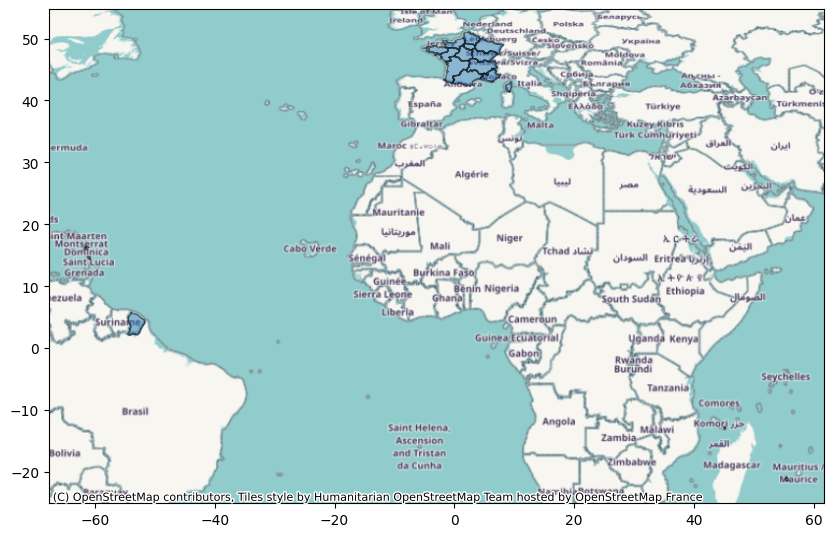

In [13]:
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, alpha=0.5, edgecolor='k')
_ = ctx.add_basemap(ax, crs=gdf.crs.to_string())
plt.show()

**Ils sont null car ils représentent les contours des éléments qui ne sont pas en France**

## 3 - Filtrer les données et ne garder que les éléments utiles

In [14]:
gdf["nom"].unique()

array(['Île-de-France', 'Centre-Val de Loire', 'Bourgogne-Franche-Comté',
       'Normandie', 'Hauts-de-France', 'Grand Est', 'Pays de la Loire',
       'Bretagne', 'Nouvelle-Aquitaine', 'Guadeloupe', 'Martinique',
       'Guyane', 'La Réunion', 'Mayotte', 'Occitanie',
       'Auvergne-Rhône-Alpes', "Provence-Alpes-Côte d'Azur", 'Corse'],
      dtype=object)

In [15]:
regions_exclure = ['Guadeloupe', 'Martinique', 'Guyane', 'La Réunion', 'Mayotte', 'Corse']
gdf = gdf[~gdf["nom"].isin(regions_exclure)]

Nettoyage des données

### Aperçu du résultat

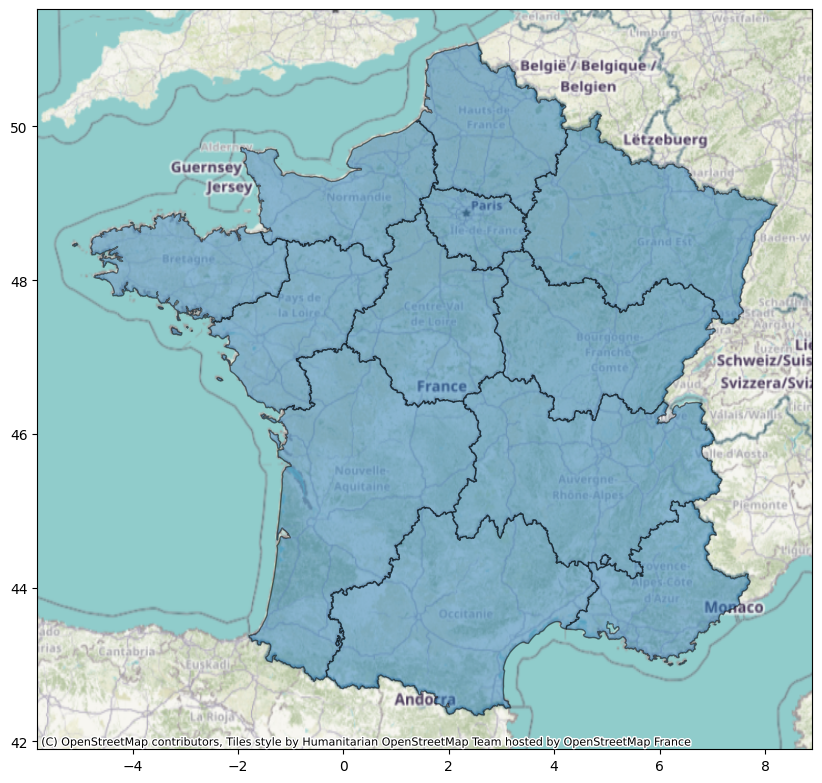

In [16]:
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, alpha=0.5, edgecolor="k")
_ = ctx.add_basemap(ax, crs=gdf.crs.to_string())
plt.show()

## 4 - Mise en correspondance (Gare, Géoloc)

Récupération des donnée utiles pour le jeux de données

In [17]:
loc_df.columns

Index(['Code plate-forme', 'Code gare', 'Code UIC',
       'Date fin validité plateforme', 'Intitulé plateforme', 'Code postal',
       'Code Commune', 'Commune', 'Code département', 'Département',
       'Longitude', 'Latitude', 'Segment DRG', 'Niveau de service', 'RG',
       'Intitulé gare', 'Intitulé fronton de gare', 'DTG', 'Région SNCF',
       'Unité gare', 'UT', 'Nbre plateformes', 'TVS', 'WGS 84'],
      dtype='object')

In [18]:
loc_df = loc_df[['Code UIC', 'Longitude', 'Latitude']]

In [19]:
loc_df.head()

,Code UIC,Longitude,Latitude
10,87784009.0,2.879779,42.696292
32,87761007.0,4.893273,44.928049
35,87757674.0,7.119498,43.585784
41,87757526.0,6.769083,43.423560
49,87755447.0,6.482498,43.455524


## 5 - Localiser les gares dans les régions (Gare_localisé + Contours régions)

In [20]:
geometry = [Point(xy) for xy in zip(loc_df['Longitude'], loc_df['Latitude'])]
loc_df = gpd.GeoDataFrame(loc_df, geometry=geometry)

loc_df.head()

,Code UIC,Longitude,Latitude,geometry
10,87784009.0,2.879779,42.696292,POINT (2.87978 42.69629)
32,87761007.0,4.893273,44.928049,POINT (4.89327 44.92805)
35,87757674.0,7.119498,43.585784,POINT (7.1195 43.58578)
41,87757526.0,6.769083,43.423560,POINT (6.76908 43.42356)
49,87755447.0,6.482498,43.455524,POINT (6.4825 43.45552)


In [21]:
for e in loc_df:
    print(e, loc_df[e].nunique())

Code UIC 169
Longitude 169
Latitude 169
geometry 169


In [22]:
loc_df = loc_df.dropna()

Retravailler la clé `Code UIC` pour passer de `float` a `int`

In [23]:
loc_df["Code UIC"].dtype

dtype('float64')

In [24]:
loc_df["Code UIC"] = loc_df["Code UIC"].astype(int)

Aperçu des points pour voir la cohérence des données

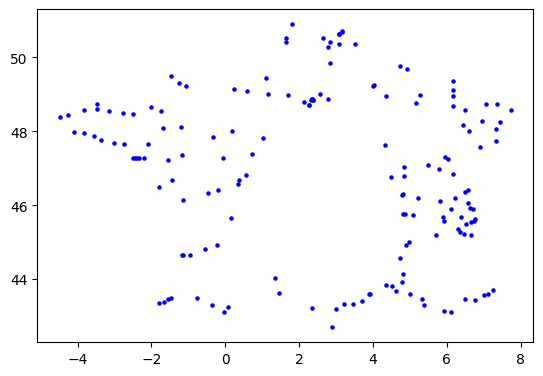

In [25]:
_ = loc_df.plot(marker='o', color='blue', markersize=5)
plt.show()

In [26]:
gdf.head()

,nom,geometry
0,Île-de-France,"POLYGON ((1.92215 48.4576, 1.92074 48.44775, 1..."
1,Centre-Val de Loire,"POLYGON ((0.81482 48.67016, 0.82767 48.68072, ..."
2,Bourgogne-Franche-Comté,"POLYGON ((6.94054 47.43337, 6.94168 47.4158, 6..."
3,Normandie,"POLYGON ((-1.11962 49.35557, -1.11503 49.3624,..."
4,Hauts-de-France,"POLYGON ((4.14089 49.97876, 4.15398 49.97484, ..."


In [27]:
gdf_contours = gpd.GeoDataFrame(gdf, geometry="geometry")
gdf_points = gpd.GeoDataFrame(loc_df, geometry="geometry")

map_region_gare = gpd.sjoin(gdf_points, gdf_contours)

map_region_gare.head()

/var/folders/84/6t__c7hd0lzdb8_1yf8w2tzc0000gn/T/ipykernel_13543/1423662961.py:4: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  map_region_gare = gpd.sjoin(gdf_points, gdf_contours)


,Code UIC,Longitude,Latitude,geometry,index_right,nom
10,87784009,2.879779,42.696292,POINT (2.87978 42.69629),14,Occitanie
32,87761007,4.893273,44.928049,POINT (4.89327 44.92805),15,Auvergne-Rhône-Alpes
35,87757674,7.119498,43.585784,POINT (7.1195 43.58578),16,Provence-Alpes-Côte d'Azur
41,87757526,6.769083,43.423560,POINT (6.76908 43.42356),16,Provence-Alpes-Côte d'Azur
49,87755447,6.482498,43.455524,POINT (6.4825 43.45552),16,Provence-Alpes-Côte d'Azur


In [28]:
map_region_gare = map_region_gare.merge(gdf_contours, on='nom')
map_region_gare.columns

Index(['Code UIC', 'Longitude', 'Latitude', 'geometry_x', 'index_right', 'nom',
       'geometry_y'],
      dtype='object')

In [29]:
map_region_gare = map_region_gare[['Code UIC', 'geometry_x', 'nom', 'geometry_y']]

In [30]:
map_region_gare.isna().sum()

Code UIC      0
geometry_x    0
nom           0
geometry_y    0
dtype: int64

In [31]:
for e in map_region_gare:
    print(map_region_gare[e].nunique())

169
169
12
12


/Users/mandresyandri/Documents/2_temp/univ/d2sn/data-sprint/d2sn-dataSprint-2024/.venv/lib/python3.12/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/var/folders/84/6t__c7hd0lzdb8_1yf8w2tzc0000gn/T/ipykernel_13543/1017572405.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab20", len(unique_regions))


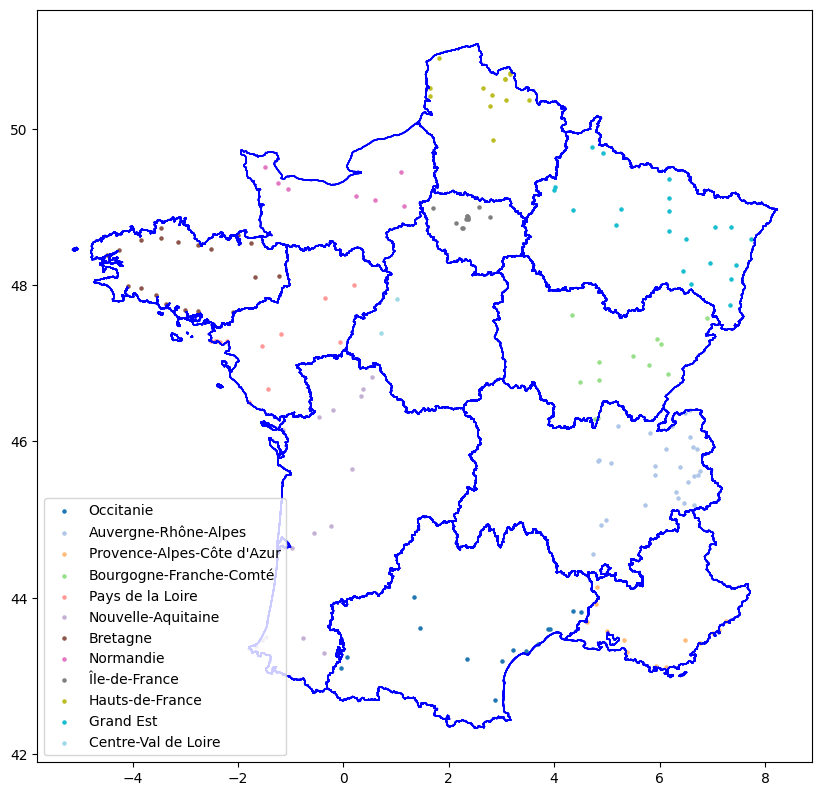

In [32]:
points_geometry = [shape(geojson) for geojson in map_region_gare["geometry_x"]]
points_gdf = gpd.GeoDataFrame(map_region_gare, geometry=points_geometry)

contours_geometry = [shape(geojson) for geojson in map_region_gare["geometry_y"]]
contours_gdf = gpd.GeoDataFrame(map_region_gare, geometry=contours_geometry)

points_gdf.crs = {"init": "epsg:4326"}
contours_gdf.crs = {"init": "epsg:4326"}

fig, ax = plt.subplots(figsize=(10, 10))

contours_gdf.boundary.plot(ax=ax, color="blue", linewidth=1)

regions = points_gdf["nom"]
unique_regions = regions.unique()
colors = plt.cm.get_cmap("tab20", len(unique_regions))

for i, region in enumerate(unique_regions):
    region_points = points_gdf[points_gdf["nom"] == region]
    region_points.plot(ax=ax, marker="o", color=colors(i), markersize=5, label=f"{region}")

plt.legend()
plt.show()

Exporter le jeux de données pour mise en commun

In [33]:
map_region_gare.to_csv('datasets/last_data/region_gare.csv', index=False)

-- END --